In [ ]:
                                # DIABETES PREDICTION USING LINEAR REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
smoking_history_counts = df['smoking_history'].value_counts()
print(smoking_history_counts)

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [ ]:
label_mapping={
    'No Info' : 0 ,
    'never'   : 1,
    'former'  :2 ,
    'current' : 3,
    'not current' : 4,
    'ever' : 5
}
df['smoking_history'] = df['smoking_history'].map(label_mapping)

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


In [ ]:
bmi_counts = df['bmi'].value_counts()
print(bmi_counts)

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64


In [ ]:
HbA1c_level_counts = df['HbA1c_level'].value_counts()
print(HbA1c_level_counts)

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64


In [ ]:
blood_glucose_level_counts = df['blood_glucose_level'].value_counts()
print(blood_glucose_level_counts)

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64


In [ ]:
diabetes_counts = df['diabetes'].value_counts()
print(diabetes_counts)

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [ ]:
x= df.drop('diabetes', axis=1)
y = df['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,1,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,1,27.32,5.7,158
3,0,36.0,0,0,3,23.45,5.0,155
4,1,76.0,1,1,3,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,2,27.83,5.7,155
99998,0,24.0,0,0,1,35.42,4.0,100


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.051218577660920354
R-squared: 0.3442497781126421


In [ ]:
y_pred_rounded=np.round(y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rounded)
print(f'Accuracy: {accuracy}')


Accuracy: 0.93865


In [ ]:
import seaborn as sns

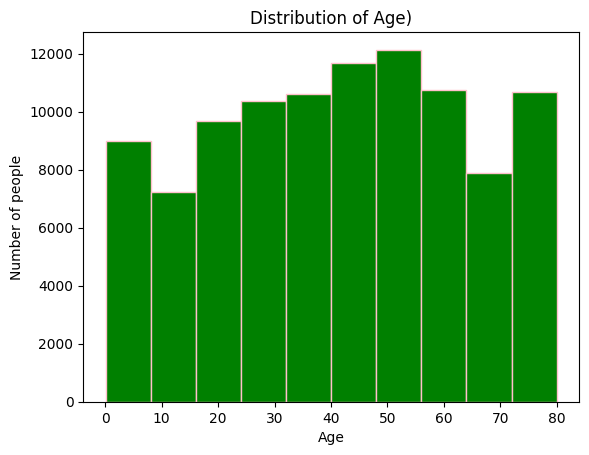

In [ ]:
# histogram for age
plt.hist(df['age'],bins=10 , edgecolor='pink' , color='Green')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age)')
plt.show()


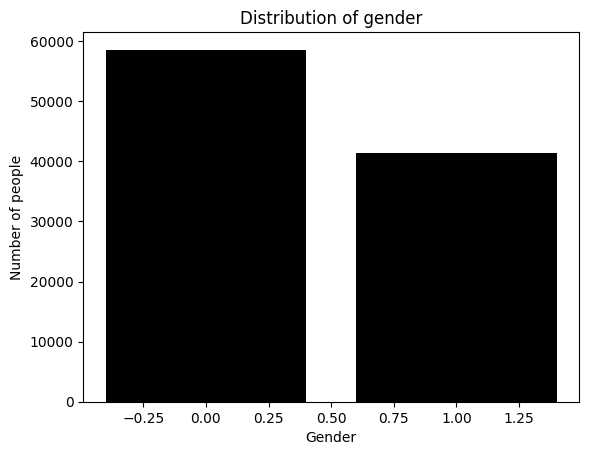

In [ ]:
# bar chat for gender
gender_counts=df['gender'].value_counts()
plt.bar(gender_counts.index,gender_counts.values , color='black')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.title('Distribution of gender')
plt.show()


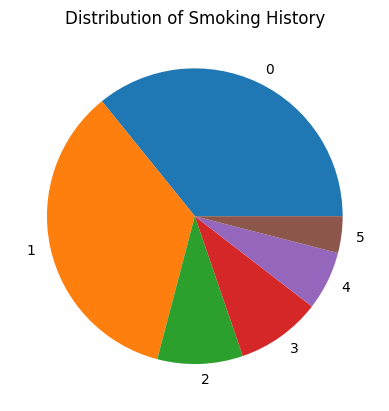

In [ ]:
# pieplot for smoking-history
smoking_history_counts=df['smoking_history'].value_counts()
plt.pie(smoking_history_counts.values , labels=smoking_history_counts.index )
plt.title('Distribution of Smoking History')
plt.show()


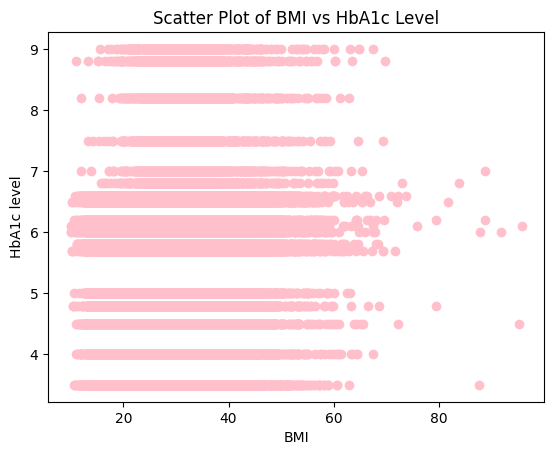

In [ ]:
# Scatter plot for BMI vs. HbA1c level
plt.scatter(df['bmi'],df['HbA1c_level'], color='pink')
plt.xlabel('BMI')
plt.ylabel('HbA1c level')
plt.title('Scatter Plot of BMI vs HbA1c Level')
plt.show()



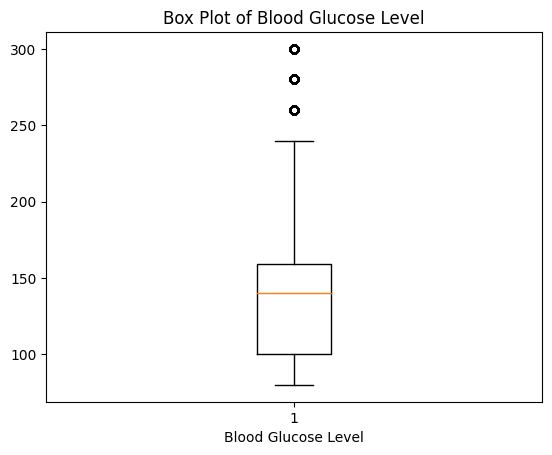

In [ ]:

# Box plot for blood glucose level
plt.boxplot(df['blood_glucose_level'])
plt.xlabel('Blood Glucose Level')
plt.title('Box Plot of Blood Glucose Level')
plt.show()


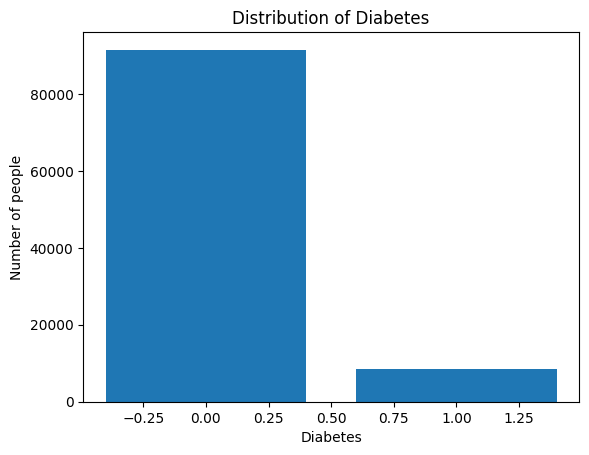

In [ ]:
# Bar chart for diabetes
diabetes_value_counts = df['diabetes'].value_counts()
plt.bar(diabetes_value_counts.index, diabetes_value_counts.values)
plt.xlabel('Diabetes')
plt.ylabel('Number of people')
plt.title('Distribution of Diabetes')
plt.show()

In [ ]:

                          # K-Nearest Neighbors (KNN) Algorithm


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of KNN model: {accuracy_knn}")

Accuracy of KNN model: 0.94995


In [ ]:
                            # Decision Tree Classifier Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create an instance of the Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the model using the training data
dt_model.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_dt = dt_model.predict(x_test)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print(f"Accuracy of Decision Tree model: {accuracy_dt}")

Accuracy of Decision Tree model: 0.953


In [ ]:
                         # Random Forest Classifier Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Create an instance of the Decision Tree classifier
rf_model = RandomForestClassifier()

# Train the model using the training data
rf_model.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_rf = rf_model.predict(x_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print(f"Accuracy of Random Forest model: {accuracy_rf}")

Accuracy of Random Forest model: 0.9538


In [ ]:
                              #  Ada Boost Classifier Algorithm

In [ ]:

from sklearn.ensemble import AdaBoostClassifier


In [ ]:
# Create an instance of the Decision Tree classifier
ab_model = AdaBoostClassifier()

# Train the model using the training data
ab_model.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_ab = ab_model.predict(x_test)

# Calculate the accuracy of the model
accuracy_ab = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print(f"Accuracy of Ada Boost model: {accuracy_ab}")

Accuracy of Ada Boost model: 0.9538


In [ ]:
                           # Models Accuracy

<ipython-input-61-d4c6515167fa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


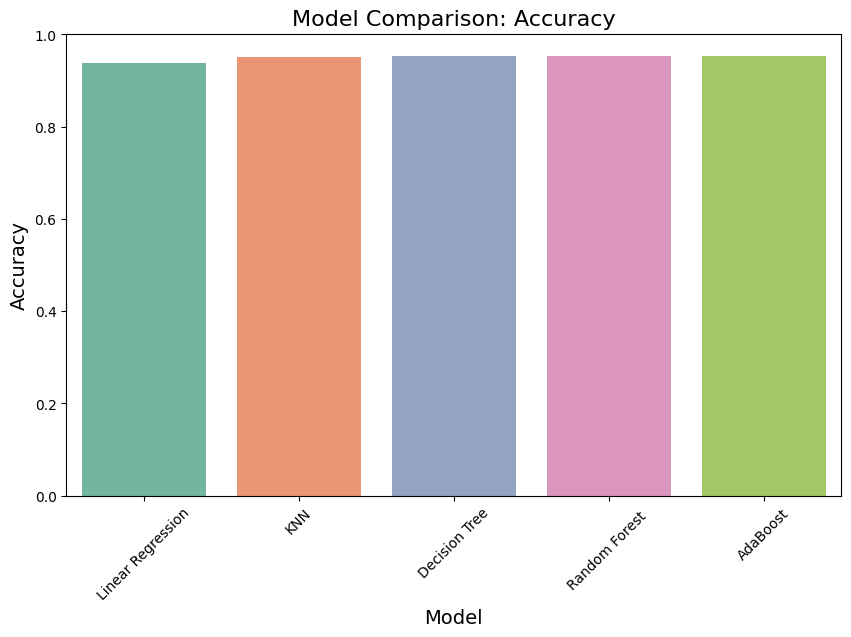

In [ ]:
# prompt: now show different color  grapgh that show model accuracy

import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of model names
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest ', 'AdaBoost']

# Create a list of corresponding accuracies
accuracies = [accuracy, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ab]

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Set2')

# Add title and labels
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
